In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('World_Happiness_Report.csv')

In [16]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [17]:
numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()

## Mutluluk Skoru ile diğer değişkenler arasında nasıl bir korelasyon var?

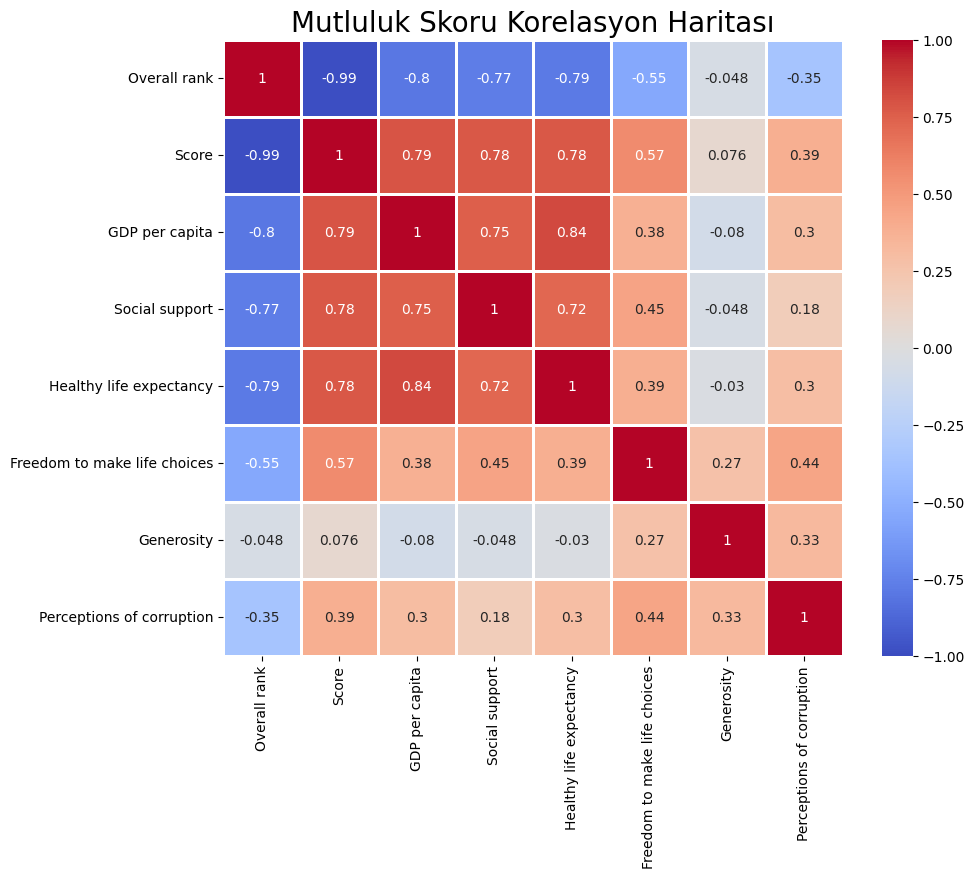

In [18]:
plt.figure(figsize=(10,8))

sns.heatmap(data=corr
            ,annot=True
            ,cmap='coolwarm'
            ,linewidths=1
            ,vmax=1
            ,vmin=-1
            ,center=0)
plt.title("Mutluluk Skoru Korelasyon Haritası" , fontsize=20)
plt.show()

## Ülkelerin mutluluk skorları ile ekonomik faktörler (GDP, sosyal destek, sağlıklı yaşam beklentisi) arasındaki korelasyon nedir?

In [28]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Çok Yüksek
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Çok Yüksek
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Çok Yüksek
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Çok Yüksek
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Çok Yüksek


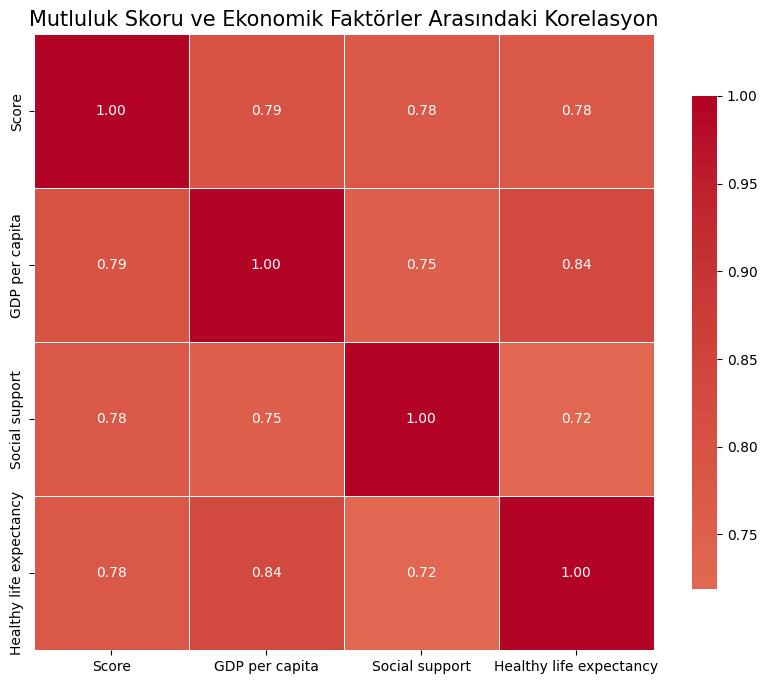

In [19]:
plt.figure(figsize=(10,8))
corr = df[['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy']].corr()

sns.heatmap(data=corr
            ,annot=True
            ,cmap='coolwarm'
            ,fmt=".2f"
            ,linewidths=.5
            ,cbar_kws={"shrink":.8}
            ,center=0)
plt.title('Mutluluk Skoru ve Ekonomik Faktörler Arasındaki Korelasyon' , fontsize=15)
plt.show()

## En mutlu 20 ülkenin tüm özelliklerinin karşılaştırmalı dağılımı nasıldır?

In [27]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Çok Yüksek
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Çok Yüksek
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Çok Yüksek
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Çok Yüksek
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Çok Yüksek


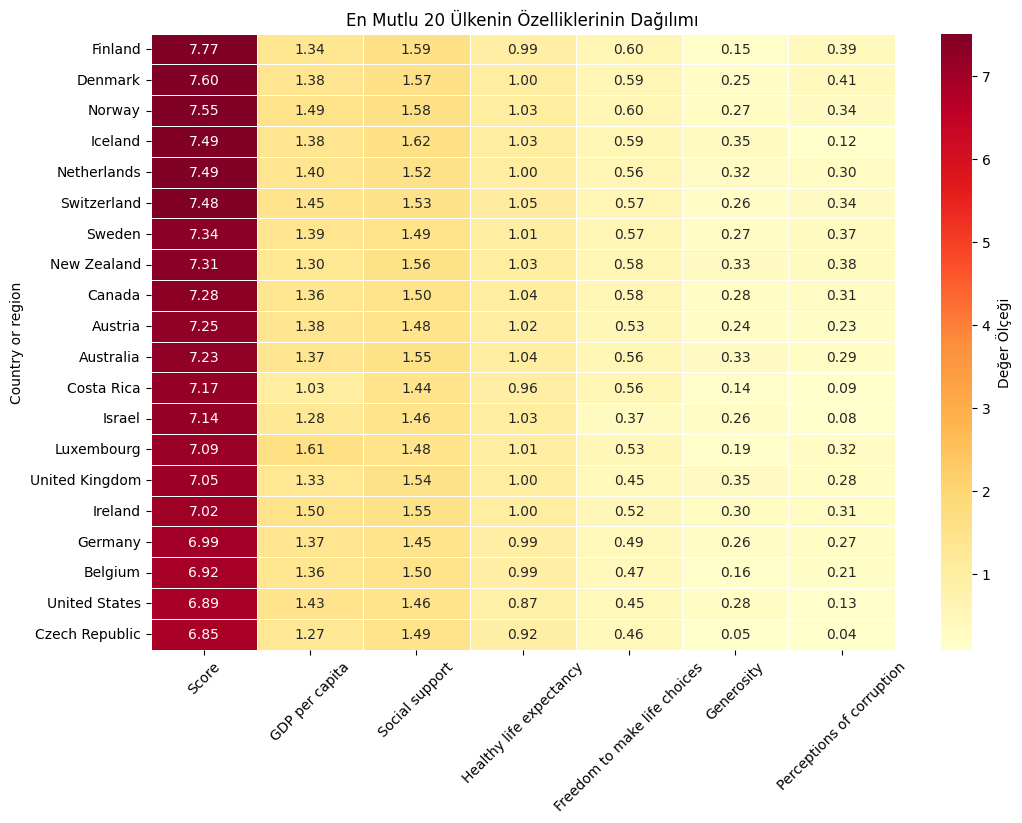

In [20]:
top20 = df.head(20).set_index('Country or region')
plt.figure(figsize=(12,8))

sns.heatmap(top20.drop(['Overall rank'] , axis=1)
            ,annot=True
            ,cmap='YlOrRd'
            ,linewidths=.5
            ,cbar_kws={'label':'Değer Ölçeği'}
            ,fmt=".2f"
            ,robust=True)
plt.title('En Mutlu 20 Ülkenin Özelliklerinin Dağılımı')
plt.xticks(rotation=45)
plt.show()

## En mutlu ve en mutsuz 10 ülkenin özellikleri nasıl farklılık gösterir?

In [26]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Çok Yüksek
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Çok Yüksek
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Çok Yüksek
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Çok Yüksek
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Çok Yüksek


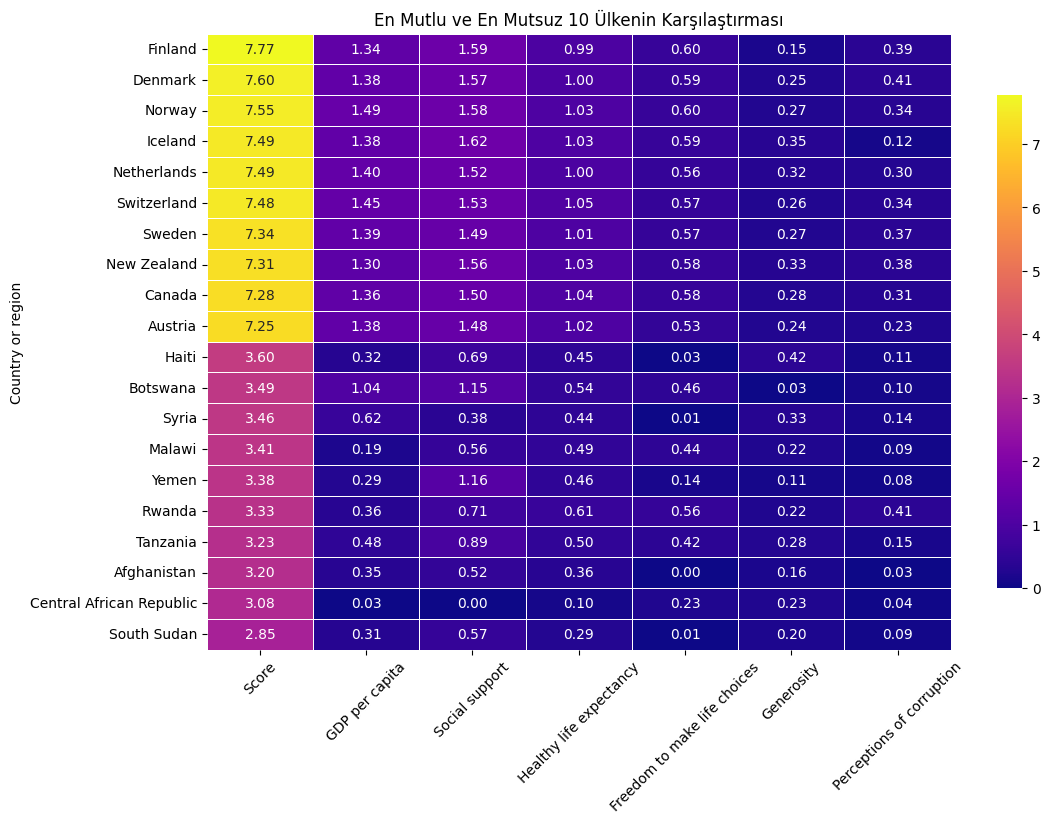

In [21]:
extreme_countries = pd.concat([df.head(10), df.tail(10)])
plt.figure(figsize=(12, 8))
sns.heatmap(extreme_countries.set_index('Country or region').drop(['Overall rank'], axis=1)
            ,cmap='plasma'
            ,annot=True
            ,fmt=".2f"
            ,linewidths=.5
            ,cbar_kws={'shrink':.8})
plt.title('En Mutlu ve En Mutsuz 10 Ülkenin Karşılaştırması')
plt.xticks(rotation=45)
plt.show()

## Mutluluk skoruna göre gruplanmış ülkelerde değişkenler nasıl dağılıyor?

In [25]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Çok Yüksek
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Çok Yüksek
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Çok Yüksek
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Çok Yüksek
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Çok Yüksek


C:\Users\erena\AppData\Local\Temp\ipykernel_16312\2732269672.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby('Score Group').mean(numeric_only=True)


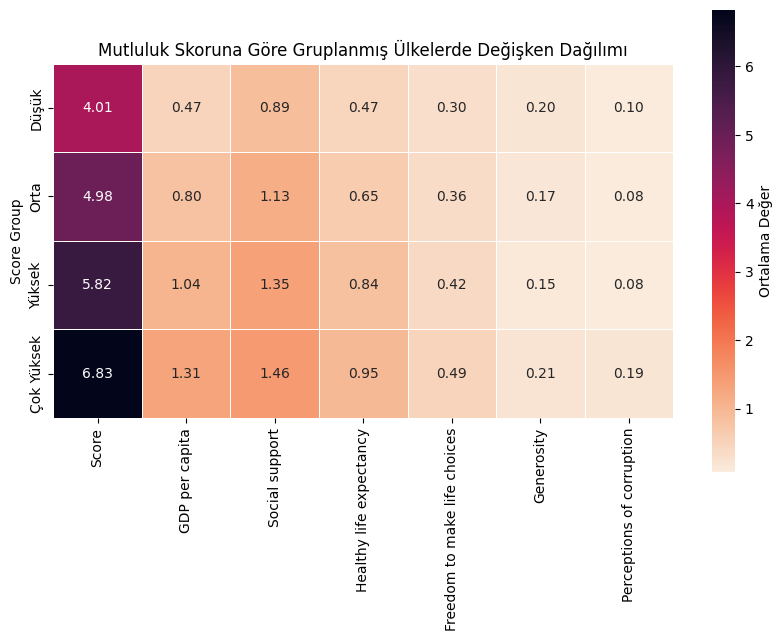

In [22]:
df['Score Group'] = pd.qcut(df['Score'], q=4,labels=['Düşük', 'Orta', 'Yüksek', 'Çok Yüksek'])
grouped_data = df.groupby('Score Group').mean(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(data=grouped_data.drop(['Overall rank'], axis=1)
            ,cmap='rocket_r'
            ,annot=True
            ,fmt=".2f"
            ,linewidths=.5
            ,cbar_kws={"label":"Ortalama Değer"}
            ,square=True)
plt.title('Mutluluk Skoruna Göre Gruplanmış Ülkelerde Değişken Dağılımı')
plt.show()

## Sosyal destek ve cömertlik değişkenlerinin mutluluk skoruna etkisi nedir?

In [24]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score Group
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Çok Yüksek
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Çok Yüksek
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Çok Yüksek
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Çok Yüksek
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Çok Yüksek


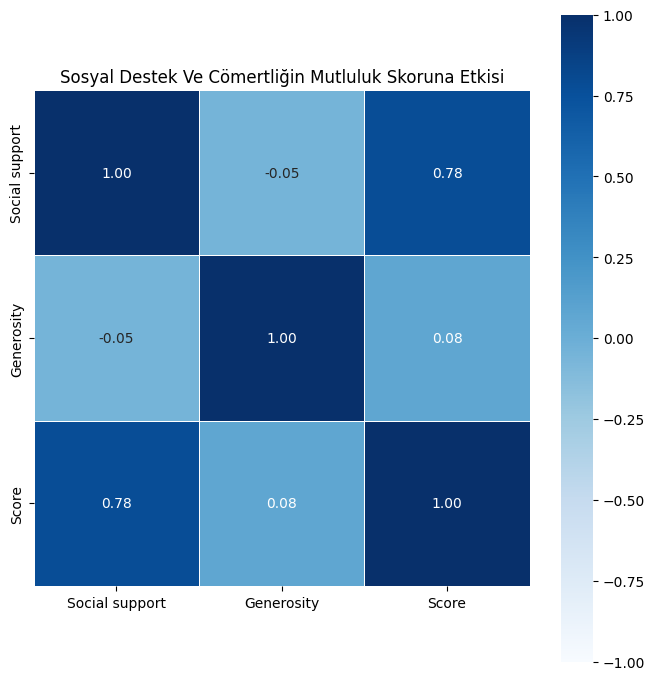

In [23]:
plt.figure(figsize=(8,12))

sns.heatmap(df[['Social support', 'Generosity', 'Score']].corr()
            ,annot=True
            ,cmap='Blues'
            ,square=True
            ,linewidths=.5
            ,cbar_kws={"shrink":.7}
            ,fmt=".2f"
            ,vmax=1
            ,vmin=-1)
plt.title("Sosyal Destek Ve Cömertliğin Mutluluk Skoruna Etkisi")
plt.show()